<a href="https://colab.research.google.com/github/rish1710/ml-assignments/blob/main/rishit_mahesh_d084_mini_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [3]:
df = pd.read_csv("//content/indian_liver_patient.csv")

In [4]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
X = df.drop('Dataset', axis=1)
y = (df['Dataset'] == 1).astype(int)

<ipython-input-4-ada1d0562e1f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [6]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print(report)

Accuracy: 0.7314285714285714
              precision    recall  f1-score   support

           0       0.54      0.38      0.45        50
           1       0.78      0.87      0.82       125

    accuracy                           0.73       175
   macro avg       0.66      0.63      0.63       175
weighted avg       0.71      0.73      0.72       175



In [7]:
print(df.head())
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())


   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [8]:
from sklearn.preprocessing import LabelEncoder

df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Dataset'] = (df['Dataset'] == 1).astype(int)


<ipython-input-8-41ab18c382ae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Dataset', axis=1)
y = df['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7314285714285714
              precision    recall  f1-score   support

           0       0.54      0.38      0.45        50
           1       0.78      0.87      0.82       125

    accuracy                           0.73       175
   macro avg       0.66      0.63      0.63       175
weighted avg       0.71      0.73      0.72       175



In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


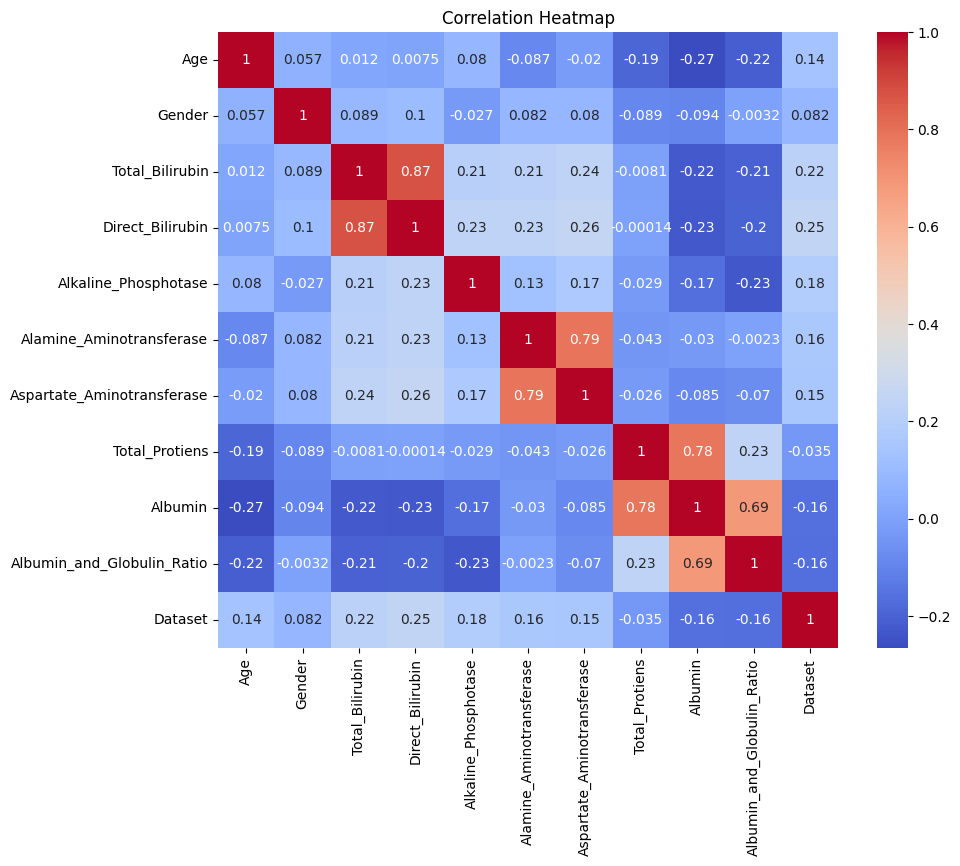

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

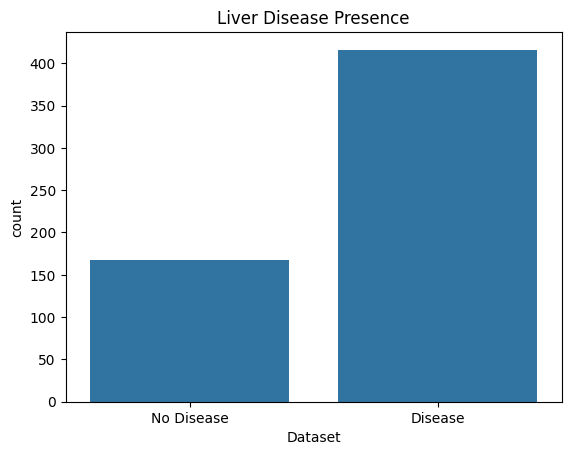

In [14]:
sns.countplot(x='Dataset', data=df)
plt.title("Liver Disease Presence")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

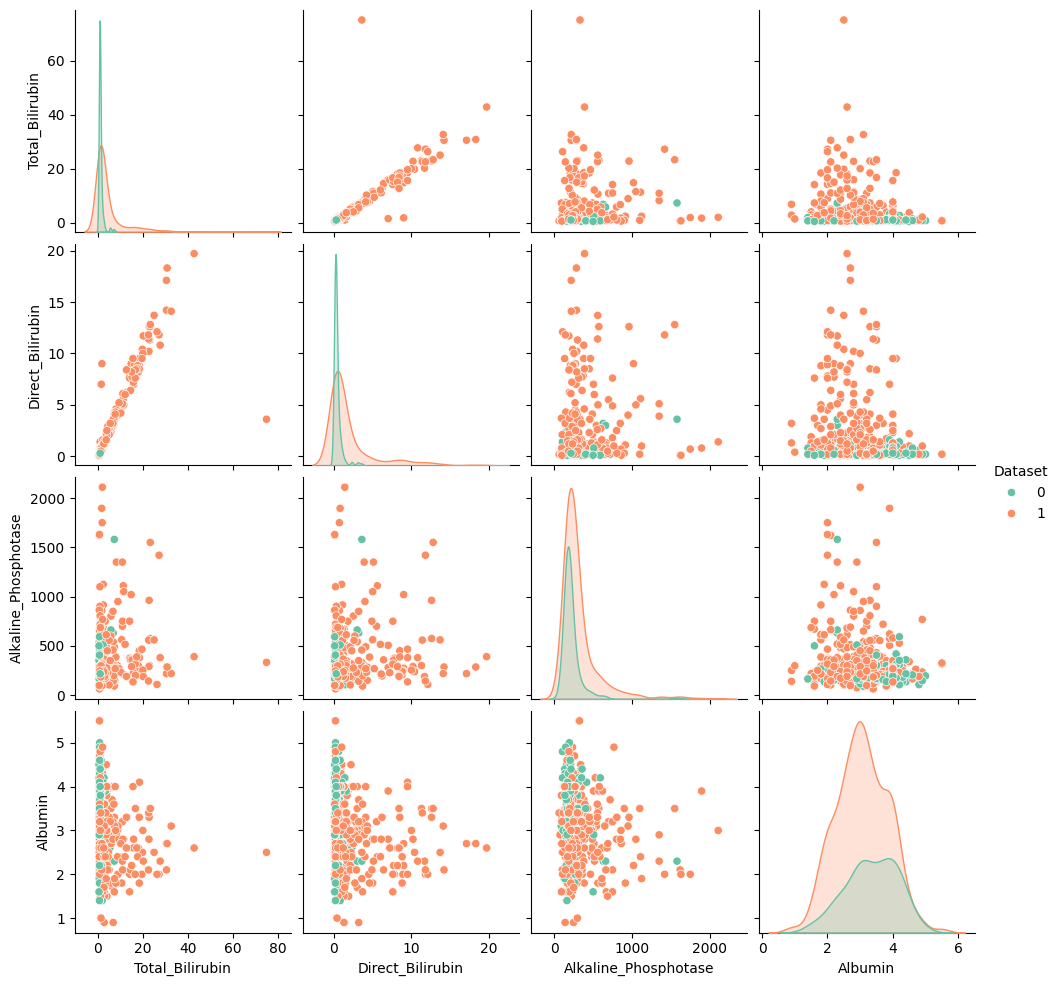

In [15]:
selected_features = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Albumin', 'Dataset']
sns.pairplot(df[selected_features], hue='Dataset', palette='Set2')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


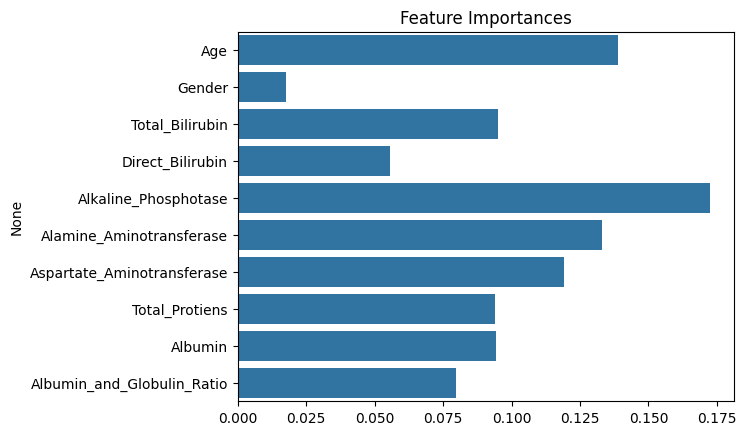

In [18]:
importances = model.feature_importances_
feat_names = X.columns
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.7066165635131153


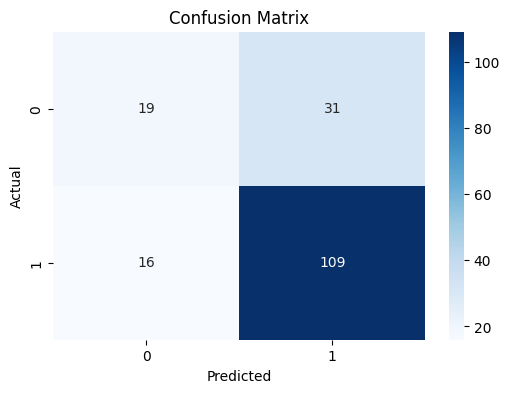

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

# Evaluate the tuned model
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}
Tuned Model Accuracy: 0.7085714285714285
              precision    recall  f1-score   support

           0       0.48      0.22      0.30        50
           1       0.74      0.90      0.82       125

    accuracy                           0.71       175
   macro avg       0.61      0.56      0.56       175
weighted avg       0.67      0.71      0.67       175

